In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk
import re


from nltk.stem.snowball import SnowballStemmer

#import pyLDAvis
#import pyLDAvis.sklearn
#nltk.download('punkt')
#nltk.download('stopwords')

In [2]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [3]:
torah_verses = pd.read_csv("Torah_Verses.csv")['0']
torah_chapters = pd.read_csv("Torah_Chapters.csv")['0']

In [4]:
stemmer = SnowballStemmer('english')

In [5]:
target = torah_verses
torah_words = [sentence for sentence in target]
torah_stemmed = [" ".join([stemmer.stem(re.sub(r'[^\w\s]', '', word)) for word in sentence.split(" ")]) for sentence in torah_words]
target_len = len(torah_stemmed)
target_len

4425

In [6]:
book_chapters = pd.read_csv("Chapter Indices.csv")['0']
chapters_indices = [[int(x) for x in chap[1:-1].split(" ")[-2:]] for chap in list(book_chapters)]
torah_books = {1:"Genesis", 2:"Exodus", 3:"Leviticus",4:"Numbers",5:"Deuteronomy"}
chapter_names = [torah_books[index[0]]+":"+str(index[1]) for index in chapters_indices ]

In [7]:
verse_labels = pd.read_csv("Verse_Labels.csv")['0']
verse_labels = np.array(verse_labels)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['thy', 'thou', 'unto'])

tf_vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=(1,1))
chapters_tf = tf_vectorizer.fit_transform(torah_stemmed)
ch_tf= pd.DataFrame(chapters_tf.toarray(),columns=tf_vectorizer.get_feature_names())

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
chapters_tfidf = tfidf_vectorizer.fit_transform(torah_stemmed)
ch_tfidf = pd.DataFrame(chapters_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())

/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [9]:
components = 5
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=components, random_state=0)
data_tf = lda_tf.fit_transform(ch_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=components, random_state=0)
lda_tfidf.fit(ch_tfidf)
data_tfidf = lda_tfidf.transform(ch_tfidf)

In [10]:
from sklearn.decomposition import TruncatedSVD
svd_tfidf=TruncatedSVD(10)
data_svd_tfidf = svd_tfidf.fit_transform(ch_tfidf)

svd_tf=TruncatedSVD(10)
data_svd_tf = svd_tfidf.fit_transform(ch_tf)

<AxesSubplot:>

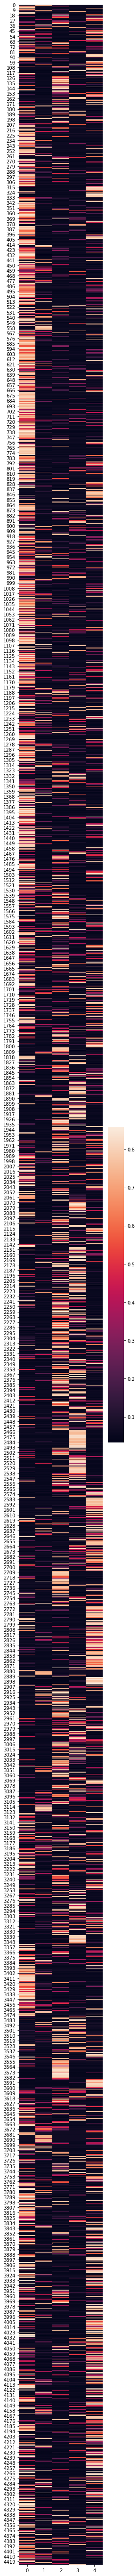

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 100))
sns.heatmap(data_tfidf)
#plt.yticks(ticks=np.linspace(0, target_len-1, target_len)+0.5, labels=chapter_names, rotation=0);

<AxesSubplot:>

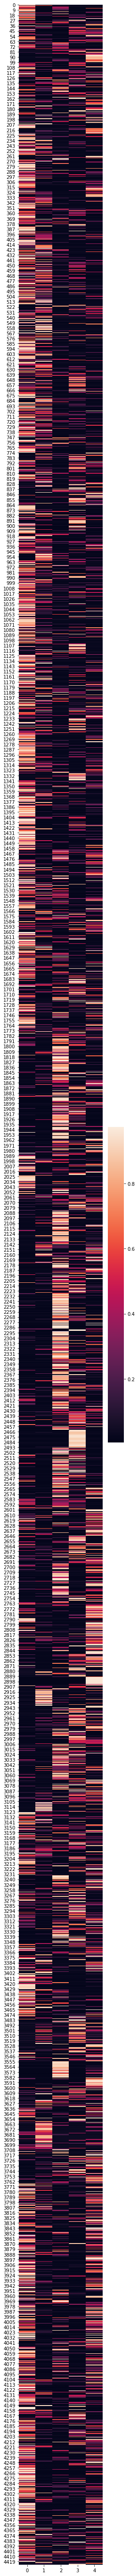

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 100))
sns.heatmap(data_tf)
#plt.yticks(ticks=np.linspace(0, target_len-1, target_len)+0.5, labels=chapter_names, rotation=0);

# NMF

In [13]:
from sklearn.decomposition import NMF
nmf_model = NMF(10)
nmf_tf = nmf_model.fit_transform(ch_tf)
nmf_tfidf = nmf_model.fit_transform(ch_tfidf)

In [14]:
topic_word = pd.DataFrame(nmf_model.components_.round(3), 
             columns = tf_vectorizer.get_feature_names())
topic_word

,aaron,abarim,abat,abel,abelshittim,abhor,abiasaph,abib,abid,abidah,...,zithri,zoan,zoar,zohar,zophim,zuar,zur,zuriel,zurishaddai,zuzim
0,0.364,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.002,0.000,0.010,0.000,0.008,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.052,0.000,0.004,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.258,0.012,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.002,...,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.005,0.000
4,0.114,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.006,0.005,0.000,0.000,0.004,0.000
5,0.000,0.003,0.000,0.013,0.000,0.000,0.000,0.000,0.011,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.462,0.000,0.000,0.000,0.000,0.011,0.007,0.000,0.000,0.004,...,0.007,0.000,0.001,0.024,0.000,0.027,0.003,0.010,0.026,0.000
7,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.004,0.006,0.000,...,0.000,0.002,0.001,0.000,0.001,0.000,0.002,0.003,0.000,0.002
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.033,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.013,0.005,0.001,0.000,0.001,0.001,0.000,0.002,0.000,0.000,...,0.000,0.003,0.012,0.000,0.001,0.000,0.001,0.000,0.000,0.002


In [15]:
topic_word = pd.DataFrame(lda_tfidf.components_.round(3), 
             columns = tfidf_vectorizer.get_feature_names())
topic_word

,aaron,abarim,abat,abel,abelshittim,abhor,abiasaph,abib,abid,abidah,...,zithri,zoan,zoar,zohar,zophim,zuar,zur,zuriel,zurishaddai,zuzim
0,10.555,1.116,0.665,0.202,0.694,0.202,0.200,0.200,2.023,0.200,...,0.200,0.200,0.255,0.201,0.200,1.763,0.200,0.674,0.200,0.200
1,0.202,0.649,0.200,0.200,0.200,0.200,0.716,0.200,0.203,0.200,...,0.718,0.200,0.207,1.538,0.200,0.202,0.200,0.200,0.201,0.200
2,26.306,0.200,0.503,2.666,0.200,0.200,0.200,0.208,1.116,0.200,...,0.200,0.498,0.482,0.200,0.596,0.200,0.374,0.200,0.200,0.208
3,16.802,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.223,0.203,...,0.200,0.200,1.815,0.200,0.200,0.200,0.686,0.222,0.200,0.501
4,2.513,0.200,0.221,0.200,0.200,2.081,0.200,1.748,0.214,0.588,...,0.200,0.200,0.204,0.200,0.200,0.200,0.200,0.200,1.759,0.200


In [16]:
def stemmit(word):
    return  stemmer.stem(re.sub(r'[^\w\s]', '', word))
stemmit('aaron')
topic_word['aaron']

0    10.555
1     0.202
2    26.306
3    16.802
4     2.513
Name: aaron, dtype: float64

<AxesSubplot:>

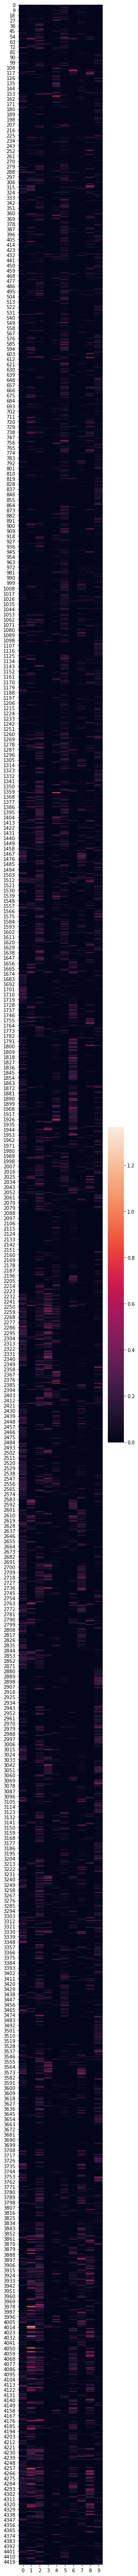

In [17]:
plt.figure(figsize=(4, 100))
sns.heatmap(nmf_tf)
#plt.yticks(ticks=np.linspace(0, target_len-1, target_len)+0.5, labels=chapter_names, rotation=0);


Topic  0
said, lord, thee, thi, god, land, came, peopl, mose, pharaoh, go, jacob, father, shall, egypt, joseph, let, went, befor, son, say, israel, hand, behold, servant, us, abraham, shalt, come, hath

Topic  1
well, shall, eye, thine, remov, children, pitch, tribe, israel, face, gad, son, encamp, journey, forward, wit, tree, river, said, thi, shalt, ye, wilder, buri, zebulun, land, host, dwelt, smitten, south

Topic  2
offer, spake, mose, lord, say, day, shall, two, aaron, upon, shalt, thousand, made, seven, first, son, hundr, sin, year, burnt, ye, number, altar, mount, end, thereof, month, lamb, six, bullock

Topic  3
shall, tabernacl, congreg, son, unclean, upon, put, priest, altar, name, door, aaron, man, shalt, burn, wash, befor, head, flesh, mose, cloth, fire, famili, everi, even, children, linen, skin, make, tent

Topic  4
shall, ye, thi, shalt, god, lord, command, thee, man, children, keep, eat, israel, year, land, ani, among, everi, old, father, day, hath, peopl, make, there

<AxesSubplot:>

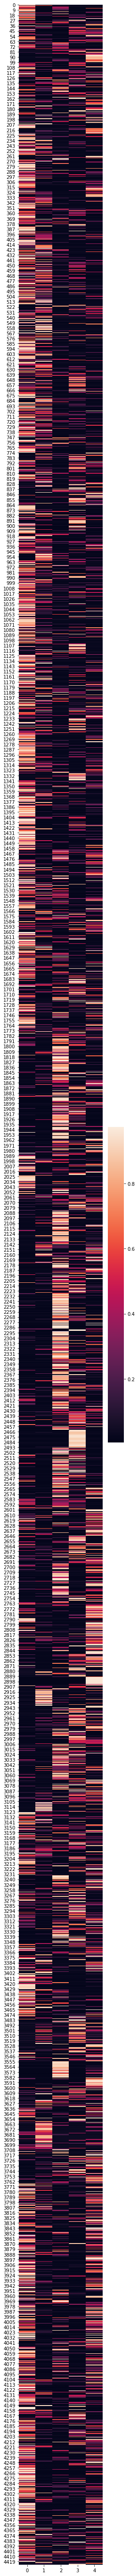

In [18]:
display_topics(lda_tfidf, tfidf_vectorizer.get_feature_names(), 30)
#Labels: First one is moses, egypt, and abraham; it's primarily present in Genesis and Exodus roughly up to the ten commandments. 
#Second one is fairly mixed, but mostly corresponds to Genesis up to Noah.
#Third one primarily corresponds to Leviticus;
#Fourth one is...hard to ID, it's primarily a collection of names.
#Fifth one is primarily found in deuteronomy; 
plt.figure(figsize=(4, 100))
sns.heatmap(data_tf)
#plt.yticks(ticks=np.linspace(0, target_len-1, target_len)+0.5, labels=chapter_names, rotation=0);

# Fitting Classification Models

In [19]:
y = verse_labels
X = nmf_tf

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

def try_to_model(model, X=X, y=y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    ros = RandomOverSampler()
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
    model.fit(X_resampled, y_resampled)
    y_guess= model.predict(X_test)
    print(type(model))
    print(classification_report(y_test, y_guess))

In [20]:
X = nmf_tf
try_to_model(KNeighborsClassifier(n_neighbors=9))
try_to_model(DecisionTreeClassifier())
try_to_model(GaussianNB())
try_to_model(RandomForestClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           d       0.35      0.56      0.43       144
           p       0.73      0.56      0.63       418
           y       0.56      0.59      0.57       323

    accuracy                           0.57       885
   macro avg       0.55      0.57      0.54       885
weighted avg       0.61      0.57      0.58       885

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           d       0.40      0.47      0.43       129
           p       0.67      0.67      0.67       403
           y       0.59      0.55      0.57       353

    accuracy                           0.59       885
   macro avg       0.55      0.56      0.56       885
weighted avg       0.60      0.59      0.59       885

<class 'sklearn.naive_bayes.GaussianNB'>
              precision    recall  f1-score   support

           d       0.4

In [21]:
X = nmf_tfidf
try_to_model(KNeighborsClassifier(n_neighbors=9))
try_to_model(DecisionTreeClassifier())
try_to_model(GaussianNB())
try_to_model(RandomForestClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           d       0.33      0.73      0.45       124
           p       0.76      0.57      0.65       419
           y       0.64      0.55      0.59       342

    accuracy                           0.58       885
   macro avg       0.57      0.61      0.56       885
weighted avg       0.65      0.58      0.60       885

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           d       0.38      0.34      0.36       122
           p       0.66      0.69      0.67       428
           y       0.56      0.55      0.56       335

    accuracy                           0.59       885
   macro avg       0.53      0.53      0.53       885
weighted avg       0.58      0.59      0.59       885

<class 'sklearn.naive_bayes.GaussianNB'>
              precision    recall  f1-score   support

           d       0.4

In [22]:
X = data_svd_tfidf
try_to_model(KNeighborsClassifier(n_neighbors=9))
try_to_model(DecisionTreeClassifier())
try_to_model(GaussianNB())
try_to_model(RandomForestClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           d       0.38      0.65      0.48       146
           p       0.71      0.62      0.67       397
           y       0.61      0.51      0.56       342

    accuracy                           0.58       885
   macro avg       0.57      0.59      0.57       885
weighted avg       0.62      0.58      0.59       885

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           d       0.48      0.40      0.44       147
           p       0.62      0.62      0.62       396
           y       0.55      0.59      0.57       342

    accuracy                           0.57       885
   macro avg       0.55      0.54      0.54       885
weighted avg       0.57      0.57      0.57       885

<class 'sklearn.naive_bayes.GaussianNB'>
              precision    recall  f1-score   support

           d       0.2

In [23]:
X = data_tfidf
try_to_model(KNeighborsClassifier(n_neighbors=9))
try_to_model(DecisionTreeClassifier())
try_to_model(GaussianNB())
try_to_model(RandomForestClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           d       0.40      0.69      0.50       127
           p       0.74      0.63      0.68       420
           y       0.61      0.56      0.59       338

    accuracy                           0.61       885
   macro avg       0.58      0.63      0.59       885
weighted avg       0.64      0.61      0.62       885

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           d       0.47      0.41      0.44       143
           p       0.70      0.69      0.69       423
           y       0.56      0.60      0.58       319

    accuracy                           0.61       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.61      0.61      0.61       885

<class 'sklearn.naive_bayes.GaussianNB'>
              precision    recall  f1-score   support

           d       0.4

In [26]:
X = data_tfidf
y=verse_labels
test_verse = "And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters."
test_stemmed = " ".join([stemmer.stem(word) for word in test_verse.split(" ")])
test_transformed = lda_tfidf.transform(tfidf_vectorizer.transform([test_stemmed]))
rfc= RandomForestClassifier().fit(X, y)
rfc.predict(test_transformed)

array(['p'], dtype=object)

In [27]:
test_transformed

array([[0.04845967, 0.71435824, 0.13738879, 0.04916024, 0.05063305]])

In [28]:
test_stemmed

'and the earth was without form, and void; and dark was upon the face of the deep. and the spirit of god move upon the face of the waters.'

In [29]:
topic_word = pd.DataFrame(lda_tfidf.components_.round(3), 
             columns = tfidf_vectorizer.get_feature_names())

words_in_test = test_stemmed.split(" ")
for word in words_in_test:
    if stemmer.stem(word) in stopwords:
        print(word+": ---------")
    else:
        print(word+ "\t "+str(list(topic_word[stemmer.stem(re.sub(r'[^\w\s]', '', word))])))
print("Features: " + str(lda_tfidf.transform(tfidf_vectorizer.transform([test_stemmed]))))
print("Prediction: " + rfc.predict(test_transformed)[0])

and: ---------
the: ---------
earth	 [7.895, 2.467, 10.68, 1.401, 9.16]
was: ---------
without	 [0.839, 0.203, 9.878, 4.815, 1.656]
form,	 [0.621, 0.962, 0.201, 0.2, 0.783]
and: ---------
void;	 [0.2, 0.523, 0.2, 0.2, 1.743]
and: ---------
dark	 [0.547, 1.126, 2.592, 1.689, 0.2]
was: ---------
upon	 [17.911, 4.299, 26.174, 23.526, 9.954]
the: ---------
face	 [9.081, 7.619, 2.921, 0.204, 2.925]
of: ---------
the: ---------
deep.	 [0.871, 0.871, 0.473, 0.2, 0.27]
and: ---------
the: ---------
spirit	 [0.205, 3.978, 0.2, 2.003, 0.202]
of: ---------
god	 [54.412, 4.575, 2.015, 0.206, 38.314]
move	 [0.744, 0.505, 0.202, 0.2, 2.068]
upon	 [17.911, 4.299, 26.174, 23.526, 9.954]
the: ---------
face	 [9.081, 7.619, 2.921, 0.204, 2.925]
of: ---------
the: ---------
waters.	 [6.859, 4.947, 8.478, 9.118, 4.279]
Features: [[0.04845967 0.71435824 0.13738879 0.04916024 0.05063305]]
Prediction: p


In [30]:
components = 5
# for TF DTM

print("Num_components" + str(components))
lda_tfidf = LatentDirichletAllocation(n_components=components, random_state=42)
X = data_tfidf = lda_tfidf.fit_transform(ch_tfidf)
try_to_model(RandomForestClassifier(random_state=42))

Num_components5
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
              precision    recall  f1-score   support

           d       0.55      0.45      0.50       135
           p       0.74      0.74      0.74       417
           y       0.62      0.66      0.64       333

    accuracy                           0.67       885
   macro avg       0.64      0.62      0.62       885
weighted avg       0.66      0.67      0.66       885



In [31]:
vectorizer = tfidf_vectorizer
src = vectorizer.transform(torah_stemmed)
model = NMF(10).fit(src)
data = model.transform(src)
classifier = RandomForestClassifier(random_state=42).fit(data, verse_labels)
to_pickle = vectorizer, model, classifier
display_topics(model, vectorizer.get_feature_names(), 10)
try_to_model(classifier, data)


Topic  0
spake, say, mose, lord, aaron, command, peopl, word, sinai, befor

Topic  1
thi, thee, shalt, god, lord, thine, make, hath, command, befor

Topic  2
shall, upon, man, unclean, put, priest, ani, everi, thing, thereof

Topic  3
israel, children, command, mose, congreg, tabernacl, aaron, accord, among, levit

Topic  4
offer, burnt, sin, sacrific, lord, altar, lamb, meat, peac, fire

Topic  5
said, go, lord, let, peopl, pharaoh, us, god, mose, behold

Topic  6
son, aaron, famili, bare, name, daughter, jacob, tribe, call, conceiv

Topic  7
number, hundr, year, thousand, two, old, famili, seven, twenti, accord

Topic  8
ye, day, shall, command, keep, eat, therefor, lord, statut, god

Topic  9
land, egypt, came, pass, went, joseph, brought, pharaoh, canaan, forth
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
              precision    recall  f1-score   support

           d       0.50      0.53      0.51       114
           p       0.73      0.71      0.72       416
  

In [32]:
import pickle

In [33]:
pickle.dump(to_pickle, open("model.p", "wb"))

<AxesSubplot:>

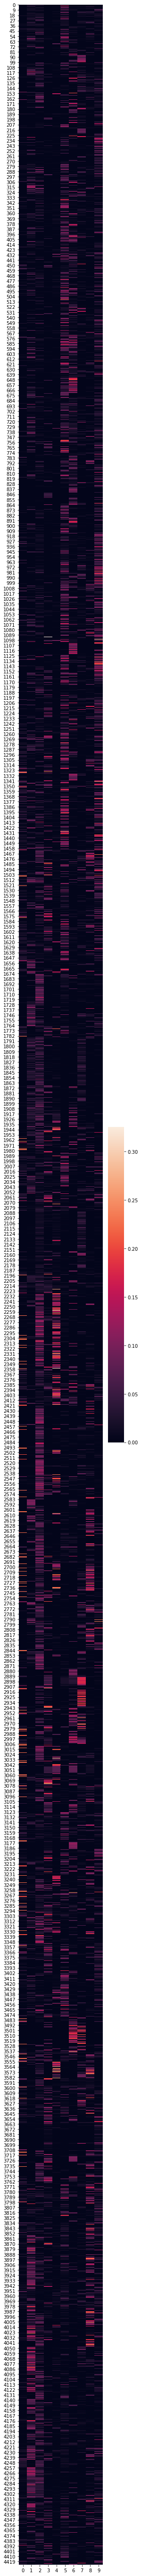

In [34]:
plt.figure(figsize=(4, 100))
sns.heatmap(data)